# <center> Zestaw 5
## <center> Ryszard Pręcikowski
### <center> 401433

In [1]:
import numpy as np
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt
from enum import Enum
import matplotlib
from scipy.integrate import quad
np.set_printoptions(precision=3, suppress=True)

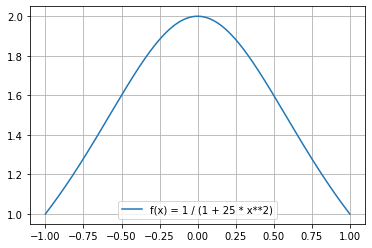

In [2]:
f = 2 / (1 + x**2)
a = -1
b = 1

lf = lambdify(x, f)
x_v = np.linspace(a, b, 1000)

plt.plot(x_v, lf(x_v), label = "f(x) = 1 / (1 + 25 * x**2)")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
class Mode(Enum):
    MIDPOINT = 0
    TRAPEZOIDAL = 1
    SIMPSON_PARABOLIC = 2
    SIMPSON_CUBIC = 3
    GAUSS_LEGENDRE = 4



def my_integrate(f, m, mode, a, b):
    def fk(k):
        # print("fk(", a + k * h,") = ",  lf(a + k * h))
        return lf(a + k * h)

    h = (b-a)/(m)
    lf = lambdify(x, f)
    # print("h", h)

    if mode == Mode.MIDPOINT:
        res = 0
        for k in range(m):
            res += fk(k + 0.5)
        res *= h

    if mode == Mode.TRAPEZOIDAL:
        res = fk(0) + fk(m)
        for k in range(1, m):
            res += 2 * fk(k)

        res *= h /2

    if mode == Mode.SIMPSON_PARABOLIC:
        res = fk(0) + fk(m)
        for k in range(1, m):
            if k % 2 == 0:
                res += 2* fk(k)
            else:
                res += 4* fk(k)

        res *= h / 3

    if mode == Mode.SIMPSON_CUBIC:
        res = fk(0) + fk(m)

        for k in range(1, m):
            if k % 3 == 0:
                res += 2* fk(k)
            else:
                res += 3* fk(k)

        res *= 3*h / 8

    if mode == Mode.GAUSS_LEGENDRE:
        res = Gauss_Legendre(f, m, a, b)

    return res

def Gauss_Legendre(f, m, a, b):
    p = legendre_poly(m, x, polys=True)
    r = p.real_roots()
    p_diff = diff(p, x)

    lf = lambdify(x, f)

    res = 0

    for xd in r:
        # print(xd)
        if xd == 0 or type(xd) == Mul:
            x_v = xd
        else:
            x_v = xd.eval_rational()
        w = 2 / ((1 - x_v**2) * (p_diff(x_v)** 2))
        # print(float(x_v), float(w))
        res += w * lf(x_v)

    # print(float(res))
    return float(res)


# f = x ** 3
# f = sqrt(1 + x**2)
# f = 2 / (1 + x**2)
# f = 1/x
my_integrate(f, 4, Mode.GAUSS_LEGENDRE, a, b)

3.1372549019607843

In [51]:
for n in range(2,5):
    print("n", n)
    true_val = integrate(f, (x, a, b))
    print("true val", true_val, "=", float(true_val))
    print()
    for mode in Mode:
        res = my_integrate(f, n, mode, a, b)
        print(mode)
        print("integral from", a, "to", b, "from", f, "=", res)
    print()

n 2
true val pi = 3.141592653589793

Mode.MIDPOINT
integral from -1 to 1 from 2/(x**2 + 1) = 3.2
Mode.TRAPEZOIDAL
integral from -1 to 1 from 2/(x**2 + 1) = 3.0
Mode.SIMPSON_PARABOLIC
integral from -1 to 1 from 2/(x**2 + 1) = 3.333333333333333
Mode.SIMPSON_CUBIC
integral from -1 to 1 from 2/(x**2 + 1) = 3.0
Mode.GAUSS_LEGENDRE
integral from -1 to 1 from 2/(x**2 + 1) = 3.0

n 3
true val pi = 3.141592653589793

Mode.MIDPOINT
integral from -1 to 1 from 2/(x**2 + 1) = 3.1794871794871793
Mode.TRAPEZOIDAL
integral from -1 to 1 from 2/(x**2 + 1) = 3.0666666666666664
Mode.SIMPSON_PARABOLIC
integral from -1 to 1 from 2/(x**2 + 1) = 2.844444444444444
Mode.SIMPSON_CUBIC
integral from -1 to 1 from 2/(x**2 + 1) = 3.1999999999999997
Mode.GAUSS_LEGENDRE
integral from -1 to 1 from 2/(x**2 + 1) = 3.1666666666666665

n 4
true val pi = 3.141592653589793

Mode.MIDPOINT
integral from -1 to 1 from 2/(x**2 + 1) = 3.162352941176471
Mode.TRAPEZOIDAL
integral from -1 to 1 from 2/(x**2 + 1) = 3.0999999999999996
M